# RiceLeaf-CNN 🌾: for 3-Class Disease

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/#fileId=https%3A//storage.googleapis.com/kaggle-colab-exported-notebooks/dewaindra/riceleaf-cnn-for-3-class-disease.15eb71df-03c4-4b3c-b6b1-ae17fc6b859d.ipynb%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com/20251230/auto/storage/goog4_request%26X-Goog-Date%3D20251230T023132Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3bb70d6260808b7166129a21f4e81c1cd04dd70ae79f0ee573c88bcd7ad54e66b78b92bd1ed51c0d7e7baf1df55ede08569ed3424048980c34a36a3d1eb8ae9bda1015e914f6e9c975cad364abe114aa4bff1cf579c51236e43d766686a2a91b9dbda13914dafd610133adf97e4f5ad4b30f3aa2725f33aff17876f0d207167e5348462c6cb800edab9f99d2bcc8ae59b03c577e065cc7a9062da55d43ce23f4d5c524c8b6029e686c941b21eaf1d7b4ad086a1617c0b0d644da1a1418c49d95b8b99d553672f95d974c12de4bd1d0bdb41ef45b2004534d496417b6753e9547cdc65d0ed9309c7c23c0c3e1ae9e397310f3895337960d1053bed67f816ecddf

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vbookshelf_rice_leaf_diseases_path = kagglehub.dataset_download('vbookshelf/rice-leaf-diseases')

print('Data source import complete.')

/home/kurao/.pyenv/versions/3.10.16/envs/tfjs-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 36.7M/36.7M [00:05<00:00, 6.59MB/s]

Extracting files...


Data source import complete.


# About Dataset
link  https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases



Of the three major crops – rice, wheat and maize – rice is by far the most important food crop for people in low- and lower-middle-income countries. Although rich and poor people alike eat rice in low-income countries, the poorest people consume relatively little wheat and are therefore deeply affected by the cost and availability of rice.

# Important

## Why These Specific Versions?

This notebook requires **TensorFlow 2.16.2** and **TensorFlowJS 4.22.0** for the following critical reasons:

### 1. **Version Compatibility**
- TensorFlow 2.16.2 and TensorFlowJS 4.22.0 are tested to work together seamlessly
- Ensures successful model conversion from Keras format to TensorFlow.js format

### 2. **Browser Compatibility**
- TensorFlowJS 4.22.0 includes fixes for loading models in web browsers
- Properly handles the model architecture and layer connections needed for inference

### 3. **Keras Format Support**
- These versions support both Keras 2 (Legacy) and Keras 3 formats
- Critical for converting the trained model to run in the web application

### 4. **Stability**
- Both versions are stable releases with known behavior
- Avoid potential bugs or breaking changes in newer versions

**⚠️ Important:** Using different versions may cause conversion errors, weight mismatches, or runtime issues in the browser. Always use these exact versions for this project.

In [ ]:
!pip install tensorflow==2.16.2 tensorflowjs==4.22.0

## Imports

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

# Check GPU availability
print("\n" + "="*50)
print("GPU Configuration")
print("="*50)
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
print(f"Built with CUDA: {tf.test.is_built_with_cuda()}")

# List all available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\nNumber of GPUs: {len(gpus)}")
    for i, gpu in enumerate(gpus):
        print(f"GPU {i}: {gpu}")
    
    # Enable memory growth to prevent TensorFlow from allocating all GPU memory
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("\nMemory growth enabled for all GPUs")
    except RuntimeError as e:
        print(e)
    
    # Set GPU as default device
    print("\nTraining will use GPU")
else:
    print("\nNo GPU found. Training will use CPU")
    print("To use GPU, ensure you have:")
    print("1. NVIDIA GPU with CUDA support")
    print("2. CUDA Toolkit installed")
    print("3. cuDNN installed")
    print("4. TensorFlow GPU version installed (pip install tensorflow-gpu or tensorflow[and-cuda])")

print("="*50 + "\n")

2025-12-30 14:24:46.858554: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-30 14:24:46.861498: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-30 14:24:46.871664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-30 14:24:46.890920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-30 14:24:46.891010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-30 14:24:46.907567: I tensorflow/core/platform/cpu_feature_guard.cc:


GPU Configuration
TensorFlow version: 2.16.2
GPU Available: []
Built with CUDA: True

No GPU found. Training will use CPU
To use GPU, ensure you have:
1. NVIDIA GPU with CUDA support
2. CUDA Toolkit installed
3. cuDNN installed
4. TensorFlow GPU version installed (pip install tensorflow-gpu or tensorflow[and-cuda])



2025-12-30 14:24:49.608769: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-30 14:24:49.609195: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Load The Data

In [3]:
# Download latest version
path = kagglehub.dataset_download("vbookshelf/rice-leaf-diseases")

print("Path to dataset files:", path)

Path to dataset files: /home/kurao/.cache/kagglehub/datasets/vbookshelf/rice-leaf-diseases/versions/1


In [4]:
print(os.listdir(path))

['rice_leaf_diseases']


In [5]:
data_dir = os.path.join(path, 'rice_leaf_diseases')

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_height = 224 # Changed to match EfficientNetB0 input size
img_width = 224 # Changed to match EfficientNetB0 input size

# Define the batch size
batch_size = 32

# Load the images, resize, and split into training and validation sets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 120 files belonging to 3 classes.
Using 96 files for training.
Using 96 files for training.
Found 120 files belonging to 3 classes.
Using 24 files for validation.
Found 120 files belonging to 3 classes.
Using 24 files for validation.


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## CNN Model

In [8]:
num_classes = 3

# Use Functional API for better TensorFlow.js compatibility
def create_model():
    inputs = keras.Input(shape=(img_height, img_width, 3), name='input_layer')
    
    x = layers.Conv2D(32, 3, activation='relu', name='conv2d_1')(inputs)
    x = layers.MaxPooling2D(name='max_pooling2d_1')(x)
    x = layers.Conv2D(64, 3, activation='relu', name='conv2d_2')(x)
    x = layers.MaxPooling2D(name='max_pooling2d_2')(x)
    x = layers.Conv2D(128, 3, activation='relu', name='conv2d_3')(x)
    x = layers.MaxPooling2D(name='max_pooling2d_3')(x)
    x = layers.Dropout(0.25, name='dropout_1')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(128, activation='relu', name='dense_1')(x)
    x = layers.Dropout(0.5, name='dropout_2')(x)
    outputs = layers.Dense(num_classes, activation='softmax', name='output')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name='riceleaf_model')
    return model

model = create_model()
model.summary()

Model: "riceleaf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
# Train model with 10 epochs
print("\n" + "="*50)
print("Training Model 1 with 10 epochs")
print("="*50)

# Verify device placement
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    print(f"Training on: {'GPU' if tf.config.list_physical_devices('GPU') else 'CPU'}")
    
epochs_10 = 10
history_10 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_10
)

loss_10, accuracy_10 = model.evaluate(val_ds)
print(f"Model 1 (10 epochs) - Validation Loss: {loss_10}")
print(f"Model 1 (10 epochs) - Validation Accuracy: {accuracy_10}")


Training Model 1 with 10 epochs
Training on: CPU
Epoch 1/10


2025-12-30 14:24:51.754242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4688 - loss: 1.0753

2025-12-30 14:24:52.392822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-12-30 14:24:52.552420: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.4062 - loss: 3.3173

2025-12-30 14:24:53.017788: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-12-30 14:24:53.169811: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 0.3438 - loss: 4.3256 - val_accuracy: 0.2917 - val_loss: 1.3248
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 0.3438 - loss: 4.3256 - val_accuracy: 0.2917 - val_loss: 1.3248
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.3542 - loss: 1.5112 - val_accuracy: 0.1667 - val_loss: 1.1219
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.3542 - loss: 1.5112 - val_accuracy: 0.1667 - val_loss: 1.1219
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - accuracy: 0.3958 - loss: 1.0891 - val_accuracy: 0.2500 - val_loss: 1.1291
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - accuracy: 0.3958 - loss: 1.0891 - val_accuracy: 0.2500 - val_loss: 1.1291
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 0.4375 - loss: 1.0901 - val_accuracy: 0.2917 - val_loss: 1.1256
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 0.4375 - loss: 1.0901 - val_accuracy: 0.2917 - val_loss: 1.1256
Epo

In [11]:
# Create and train model with 20 epochs
print("\n" + "="*50)
print("Training Model 2 with 20 epochs")
print("="*50)
model_20 = create_model()

model_20.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

epochs_20 = 20
history_20 = model_20.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_20
)

loss_20, accuracy_20 = model_20.evaluate(val_ds)
print(f"Model 2 (20 epochs) - Validation Loss: {loss_20}")
print(f"Model 2 (20 epochs) - Validation Accuracy: {accuracy_20}")


Training Model 2 with 20 epochs
Epoch 1/20
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 716ms/step - accuracy: 0.3021 - loss: 2.7542 - val_accuracy: 0.2917 - val_loss: 1.0897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 716ms/step - accuracy: 0.3021 - loss: 2.7542 - val_accuracy: 0.2917 - val_loss: 1.0897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step - accuracy: 0.3438 - loss: 1.3190 - val_accuracy: 0.2500 - val_loss: 1.1698
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step - accuracy: 0.3438 - loss: 1.3190 - val_accuracy: 0.2500 - val_loss: 1.1698
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 0.4479 - loss: 1.0732 - val_accuracy: 0.3333 - val_loss: 1.1582
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 0.4479 - loss: 1.0732 - val_accuracy: 0.3333 - val_loss: 1.1582
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.3646 - loss: 1.0628 - val_accuracy: 0.6250 - val_loss: 1.0060
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.3646 - los

In [12]:
# Create and train model with 30 epochs
print("\n" + "="*50)
print("Training Model 3 with 30 epochs")
print("="*50)
model_30 = create_model()

model_30.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

epochs_30 = 30
history_30 = model_30.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_30
)

loss_30, accuracy_30 = model_30.evaluate(val_ds)
print(f"Model 3 (30 epochs) - Validation Loss: {loss_30}")
print(f"Model 3 (30 epochs) - Validation Accuracy: {accuracy_30}")


Training Model 3 with 30 epochs
Epoch 1/30
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - accuracy: 0.3646 - loss: 2.7149 - val_accuracy: 0.2917 - val_loss: 1.1356
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - accuracy: 0.3646 - loss: 2.7149 - val_accuracy: 0.2917 - val_loss: 1.1356
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step - accuracy: 0.4479 - loss: 1.1980 - val_accuracy: 0.2917 - val_loss: 1.0829
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step - accuracy: 0.4479 - loss: 1.1980 - val_accuracy: 0.2917 - val_loss: 1.0829
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step - accuracy: 0.4271 - loss: 1.0354 - val_accuracy: 0.3333 - val_loss: 1.2019
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step - accuracy: 0.4271 - loss: 1.0354 - val_accuracy: 0.3333 - val_loss: 1.2019
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 0.4896 - loss: 0.9858 - val_accuracy: 0.3333 - val_loss: 1.0936
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 0.4896 - los

In [13]:
# Print comparison summary
print("\n" + "="*50)
print("COMPARISON SUMMARY")
print("="*50)
print(f"Model 1 (10 epochs): Loss = {loss_10:.4f}, Accuracy = {accuracy_10:.4f}")
print(f"Model 2 (20 epochs): Loss = {loss_20:.4f}, Accuracy = {accuracy_20:.4f}")
print(f"Model 3 (30 epochs): Loss = {loss_30:.4f}, Accuracy = {accuracy_30:.4f}")


COMPARISON SUMMARY
Model 1 (10 epochs): Loss = 1.0193, Accuracy = 0.4583
Model 2 (20 epochs): Loss = 0.6616, Accuracy = 0.7500
Model 3 (30 epochs): Loss = 0.3677, Accuracy = 0.8750


## Results

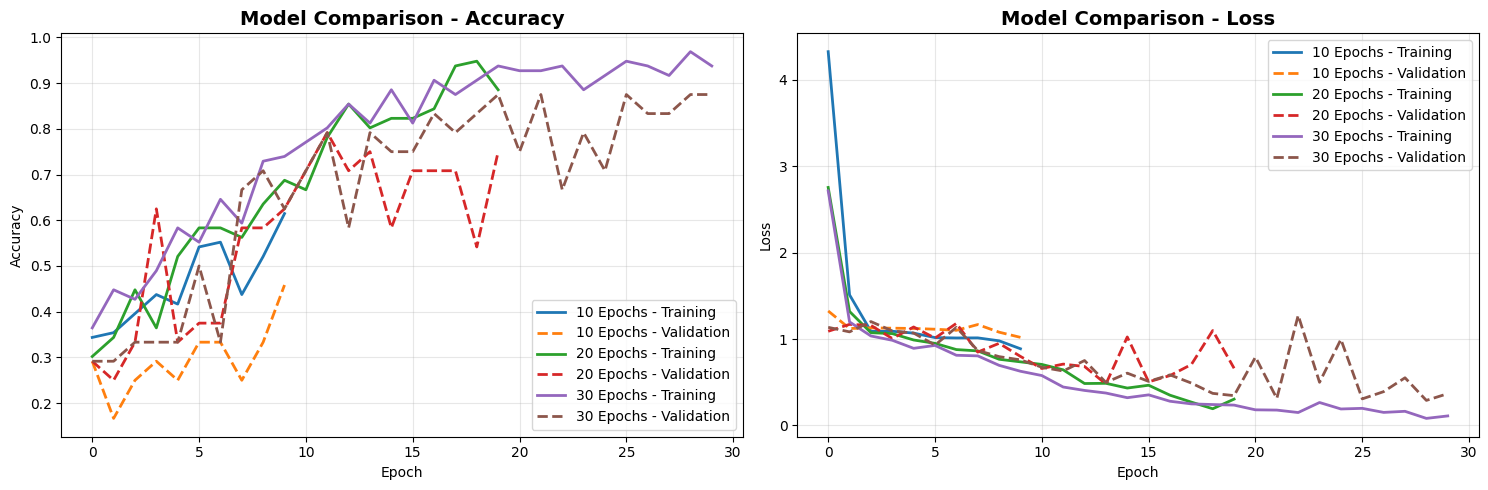

In [14]:
# Plot comparison of all three models - Accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_10.history['accuracy'], label='10 Epochs - Training', linewidth=2)
plt.plot(history_10.history['val_accuracy'], label='10 Epochs - Validation', linewidth=2, linestyle='--')
plt.plot(history_20.history['accuracy'], label='20 Epochs - Training', linewidth=2)
plt.plot(history_20.history['val_accuracy'], label='20 Epochs - Validation', linewidth=2, linestyle='--')
plt.plot(history_30.history['accuracy'], label='30 Epochs - Training', linewidth=2)
plt.plot(history_30.history['val_accuracy'], label='30 Epochs - Validation', linewidth=2, linestyle='--')
plt.title('Model Comparison - Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Plot comparison of all three models - Loss
plt.subplot(1, 2, 2)
plt.plot(history_10.history['loss'], label='10 Epochs - Training', linewidth=2)
plt.plot(history_10.history['val_loss'], label='10 Epochs - Validation', linewidth=2, linestyle='--')
plt.plot(history_20.history['loss'], label='20 Epochs - Training', linewidth=2)
plt.plot(history_20.history['val_loss'], label='20 Epochs - Validation', linewidth=2, linestyle='--')
plt.plot(history_30.history['loss'], label='30 Epochs - Training', linewidth=2)
plt.plot(history_30.history['val_loss'], label='30 Epochs - Validation', linewidth=2, linestyle='--')
plt.title('Model Comparison - Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

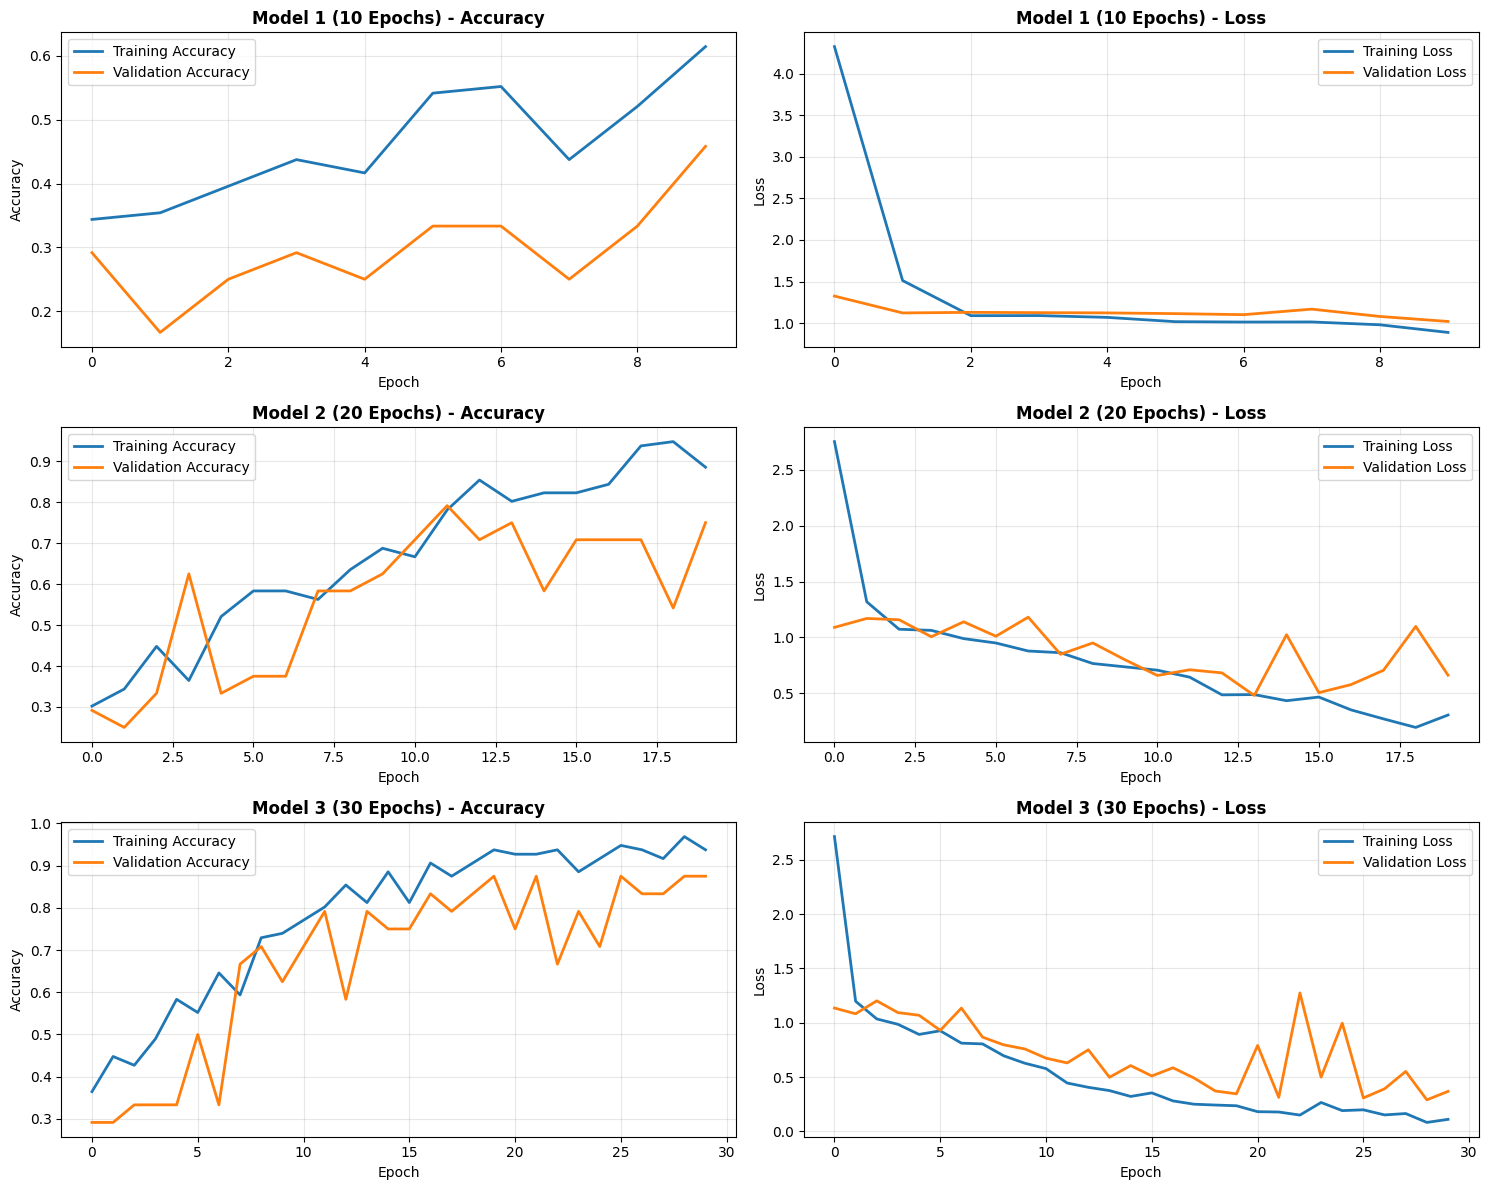

In [15]:
# Plot individual model performance
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Model 1 (10 epochs)
axes[0, 0].plot(history_10.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 0].plot(history_10.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 0].set_title('Model 1 (10 Epochs) - Accuracy', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history_10.history['loss'], label='Training Loss', linewidth=2)
axes[0, 1].plot(history_10.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 1].set_title('Model 1 (10 Epochs) - Loss', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Model 2 (20 epochs)
axes[1, 0].plot(history_20.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1, 0].plot(history_20.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1, 0].set_title('Model 2 (20 Epochs) - Accuracy', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history_20.history['loss'], label='Training Loss', linewidth=2)
axes[1, 1].plot(history_20.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1, 1].set_title('Model 2 (20 Epochs) - Loss', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Model 3 (30 epochs)
axes[2, 0].plot(history_30.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[2, 0].plot(history_30.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[2, 0].set_title('Model 3 (30 Epochs) - Accuracy', fontweight='bold')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Accuracy')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].plot(history_30.history['loss'], label='Training Loss', linewidth=2)
axes[2, 1].plot(history_30.history['val_loss'], label='Validation Loss', linewidth=2)
axes[2, 1].set_title('Model 3 (30 Epochs) - Loss', fontweight='bold')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

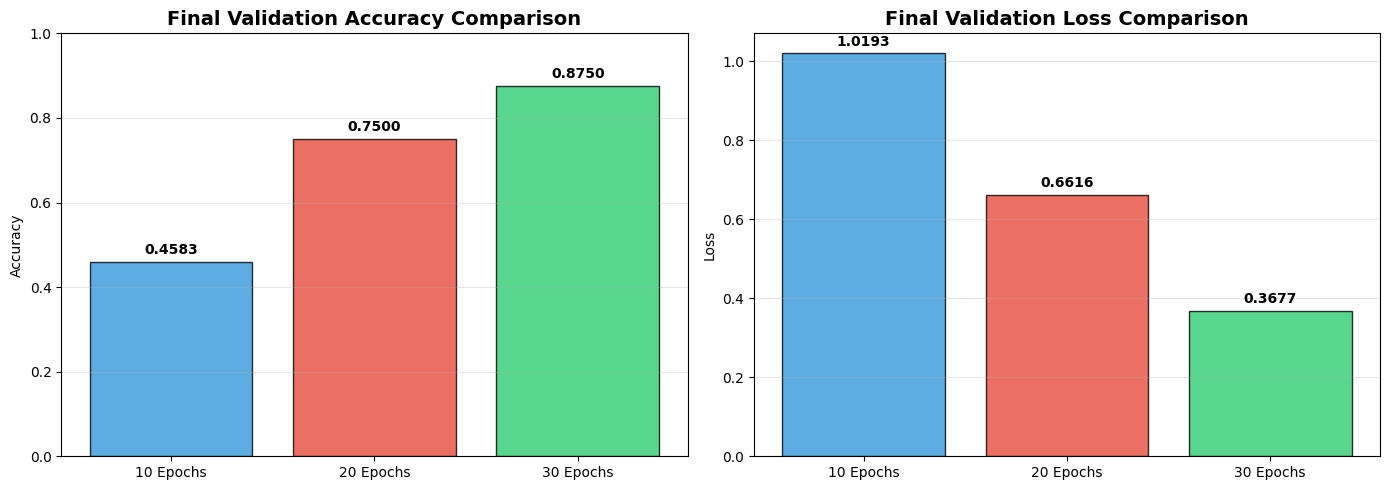

In [16]:
# Bar chart comparison of final metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

models = ['10 Epochs', '20 Epochs', '30 Epochs']
accuracies = [accuracy_10, accuracy_20, accuracy_30]
losses = [loss_10, loss_20, loss_30]

ax1.bar(models, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
ax1.set_title('Final Validation Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0, 1])
ax1.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

ax2.bar(models, losses, color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
ax2.set_title('Final Validation Loss Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Loss')
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(losses):
    ax2.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


2025-12-30 14:26:52.965085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


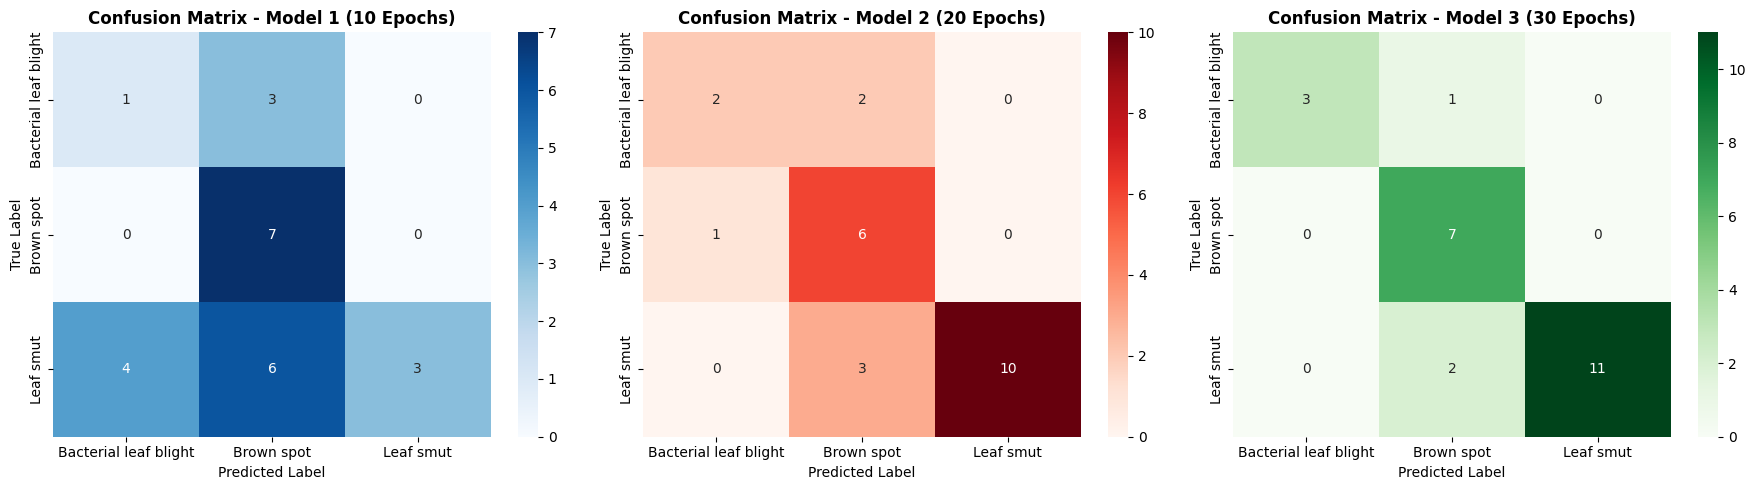

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# Get the true labels from the validation dataset
true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Get the class names from the directory structure
class_names = sorted(os.listdir(data_dir))

# Create confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model 1 (10 epochs)
predictions_10 = model.predict(val_ds)
predicted_labels_10 = np.argmax(predictions_10, axis=1)
cm_10 = confusion_matrix(true_labels, predicted_labels_10)
sns.heatmap(cm_10, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - Model 1 (10 Epochs)', fontweight='bold')

# Model 2 (20 epochs)
predictions_20 = model_20.predict(val_ds)
predicted_labels_20 = np.argmax(predictions_20, axis=1)
cm_20 = confusion_matrix(true_labels, predicted_labels_20)
sns.heatmap(cm_20, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix - Model 2 (20 Epochs)', fontweight='bold')

# Model 3 (30 epochs)
predictions_30 = model_30.predict(val_ds)
predicted_labels_30 = np.argmax(predictions_30, axis=1)
cm_30 = confusion_matrix(true_labels, predicted_labels_30)
sns.heatmap(cm_30, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')
axes[2].set_title('Confusion Matrix - Model 3 (30 Epochs)', fontweight='bold')

plt.tight_layout()
plt.show()

## Model Evaluation & Metrics

In [18]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Detailed evaluation for each model
print("\n" + "="*60)
print("DETAILED MODEL EVALUATION")
print("="*60)

# Model 1 (10 epochs)
print("\n--- Model 1 (10 Epochs) ---")
print(classification_report(true_labels, predicted_labels_10, target_names=class_names))
precision_10, recall_10, f1_10, _ = precision_recall_fscore_support(true_labels, predicted_labels_10, average='weighted')
print(f"Weighted Precision: {precision_10:.4f}")
print(f"Weighted Recall: {recall_10:.4f}")
print(f"Weighted F1-Score: {f1_10:.4f}")

# Model 2 (20 epochs)
print("\n--- Model 2 (20 Epochs) ---")
print(classification_report(true_labels, predicted_labels_20, target_names=class_names))
precision_20, recall_20, f1_20, _ = precision_recall_fscore_support(true_labels, predicted_labels_20, average='weighted')
print(f"Weighted Precision: {precision_20:.4f}")
print(f"Weighted Recall: {recall_20:.4f}")
print(f"Weighted F1-Score: {f1_20:.4f}")

# Model 3 (30 epochs)
print("\n--- Model 3 (30 Epochs) ---")
print(classification_report(true_labels, predicted_labels_30, target_names=class_names))
precision_30, recall_30, f1_30, _ = precision_recall_fscore_support(true_labels, predicted_labels_30, average='weighted')
print(f"Weighted Precision: {precision_30:.4f}")
print(f"Weighted Recall: {recall_30:.4f}")
print(f"Weighted F1-Score: {f1_30:.4f}")


DETAILED MODEL EVALUATION

--- Model 1 (10 Epochs) ---
                       precision    recall  f1-score   support

Bacterial leaf blight       0.20      0.25      0.22         4
           Brown spot       0.44      1.00      0.61         7
            Leaf smut       1.00      0.23      0.38        13

             accuracy                           0.46        24
            macro avg       0.55      0.49      0.40        24
         weighted avg       0.70      0.46      0.42        24

Weighted Precision: 0.7026
Weighted Recall: 0.4583
Weighted F1-Score: 0.4177

--- Model 2 (20 Epochs) ---
                       precision    recall  f1-score   support

Bacterial leaf blight       0.67      0.50      0.57         4
           Brown spot       0.55      0.86      0.67         7
            Leaf smut       1.00      0.77      0.87        13

             accuracy                           0.75        24
            macro avg       0.74      0.71      0.70        24
         weigh

In [19]:
# Summary comparison
print("\n" + "="*60)
print("METRICS COMPARISON SUMMARY")
print("="*60)
print(f"{'Model':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 60)
print(f"{'10 Epochs':<20} {accuracy_10:<12.4f} {precision_10:<12.4f} {recall_10:<12.4f} {f1_10:<12.4f}")
print(f"{'20 Epochs':<20} {accuracy_20:<12.4f} {precision_20:<12.4f} {recall_20:<12.4f} {f1_20:<12.4f}")
print(f"{'30 Epochs':<20} {accuracy_30:<12.4f} {precision_30:<12.4f} {recall_30:<12.4f} {f1_30:<12.4f}")

# Determine best model
best_accuracy = max(accuracy_10, accuracy_20, accuracy_30)
best_model_name = ""
best_model = None

if best_accuracy == accuracy_10:
    best_model_name = "Model 1 (10 epochs)"
    best_model = model
elif best_accuracy == accuracy_20:
    best_model_name = "Model 2 (20 epochs)"
    best_model = model_20
else:
    best_model_name = "Model 3 (30 epochs)"
    best_model = model_30

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


METRICS COMPARISON SUMMARY
Model                Accuracy     Precision    Recall       F1-Score    
------------------------------------------------------------
10 Epochs            0.4583       0.7026       0.4583       0.4177      
20 Epochs            0.7500       0.8119       0.7500       0.7607      
30 Epochs            0.8750       0.9125       0.8750       0.8796      

🏆 Best Model: Model 3 (30 epochs) with Accuracy: 0.8750


## Save Models

In [20]:
import shutil
import subprocess

print("\n" + "="*60)
print("SAVING MODELS")
print("="*60)

# Create models directory if it doesn't exist
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Created directory: {models_dir}")

# Save all models in H5 format
print("\n--- Saving models in H5 format ---")
model_10_path = os.path.join(models_dir, "riceleaf_model_10epochs.h5")
model_20_path = os.path.join(models_dir, "riceleaf_model_20epochs.h5")
model_30_path = os.path.join(models_dir, "riceleaf_model_30epochs.h5")
best_model_path = os.path.join(models_dir, "riceleaf_best_model.h5")

# Ensure models are fully built before saving (important for TFJS)
model.build(input_shape=(None, img_height, img_width, 3))
model_20.build(input_shape=(None, img_height, img_width, 3))
model_30.build(input_shape=(None, img_height, img_width, 3))
best_model.build(input_shape=(None, img_height, img_width, 3))

model.save(model_10_path)
print(f"✓ Saved: {model_10_path}")

model_20.save(model_20_path)
print(f"✓ Saved: {model_20_path}")

model_30.save(model_30_path)
print(f"✓ Saved: {model_30_path}")

best_model.save(best_model_path)
print(f"✓ Saved Best Model: {best_model_path}")


SAVING MODELS
Created directory: saved_models

--- Saving models in H5 format ---


✓ Saved: saved_models/riceleaf_model_10epochs.h5


✓ Saved: saved_models/riceleaf_model_20epochs.h5


✓ Saved: saved_models/riceleaf_model_30epochs.h5
✓ Saved Best Model: saved_models/riceleaf_best_model.h5
✓ Saved Best Model: saved_models/riceleaf_best_model.h5


In [21]:
# Save models in Keras format (recommended for Keras 3)
print("\n--- Saving models in Keras format ---")
keras_10_path = os.path.join(models_dir, "riceleaf_model_10epochs.keras")
keras_20_path = os.path.join(models_dir, "riceleaf_model_20epochs.keras")
keras_30_path = os.path.join(models_dir, "riceleaf_model_30epochs.keras")
keras_best_path = os.path.join(models_dir, "riceleaf_best_model.keras")

model.save(keras_10_path)
print(f"✓ Saved: {keras_10_path}")

model_20.save(keras_20_path)
print(f"✓ Saved: {keras_20_path}")

model_30.save(keras_30_path)
print(f"✓ Saved: {keras_30_path}")

best_model.save(keras_best_path)
print(f"✓ Saved Best Model (Keras): {keras_best_path}")


--- Saving models in Keras format ---
✓ Saved: saved_models/riceleaf_model_10epochs.keras
✓ Saved: saved_models/riceleaf_model_10epochs.keras
✓ Saved: saved_models/riceleaf_model_20epochs.keras
✓ Saved: saved_models/riceleaf_model_20epochs.keras
✓ Saved: saved_models/riceleaf_model_30epochs.keras
✓ Saved: saved_models/riceleaf_model_30epochs.keras
✓ Saved Best Model (Keras): saved_models/riceleaf_best_model.keras
✓ Saved Best Model (Keras): saved_models/riceleaf_best_model.keras


In [22]:
# Convert best model to TensorFlow.js format
print("\n--- Converting best model to TensorFlow.js format ---")
js_model_dir = os.path.join(models_dir, "jsModel")

# Clean up old TFJS files to prevent weight mismatch errors
if os.path.exists(js_model_dir):
    shutil.rmtree(js_model_dir)
    print(f"🧹 Cleaned old TFJS model directory")

try:
    # Try to convert using tensorflowjs_converter
    converter_cmd = [
        "tensorflowjs_converter",
        "--input_format", "keras",
        "--output_format", "tfjs_layers_model",
        best_model_path,
        js_model_dir
    ]
    
    result = subprocess.run(converter_cmd, capture_output=True, text=True)
    
    if result.returncode == 0:
        print(f"✓ TensorFlow.js model saved to: {js_model_dir}")
        print(f"✓ Input shape verified: (null, {img_height}, {img_width}, 3)")
        
        # Create zip file
        zip_filename = os.path.join(models_dir, "web_model")
        if os.path.exists(f"{zip_filename}.zip"):
            os.remove(f"{zip_filename}.zip")
        shutil.make_archive(zip_filename, 'zip', js_model_dir)
        print(f"✓ Zipped TensorFlow.js model saved as: {zip_filename}.zip")
        
        # Verification
        model_json_path = os.path.join(js_model_dir, "model.json")
        if os.path.exists(model_json_path):
            import json
            with open(model_json_path, 'r') as f:
                model_json = json.load(f)
                print(f"✓ model.json created successfully")
                print(f"✓ Model format: {model_json.get('format', 'unknown')}")
    else:
        print("⚠ tensorflowjs_converter not found or failed")
        print("To install: pip install tensorflowjs")
        print(f"Error: {result.stderr}")
        
except Exception as e:
    print(f"⚠ Could not convert to TensorFlow.js: {str(e)}")
    print("To install tensorflowjs: pip install tensorflowjs")


--- Converting best model to TensorFlow.js format ---
✓ TensorFlow.js model saved to: saved_models/jsModel
✓ Input shape verified: (null, 224, 224, 3)
✓ TensorFlow.js model saved to: saved_models/jsModel
✓ Input shape verified: (null, 224, 224, 3)
✓ Zipped TensorFlow.js model saved as: saved_models/web_model.zip
✓ model.json created successfully
✓ Model format: layers-model
✓ Zipped TensorFlow.js model saved as: saved_models/web_model.zip
✓ model.json created successfully
✓ Model format: layers-model


In [23]:
# Save model metadata
print("\n--- Saving model metadata ---")
metadata = {
    "model_10_epochs": {
        "accuracy": float(accuracy_10),
        "loss": float(loss_10),
        "precision": float(precision_10),
        "recall": float(recall_10),
        "f1_score": float(f1_10),
        "path": model_10_path
    },
    "model_20_epochs": {
        "accuracy": float(accuracy_20),
        "loss": float(loss_20),
        "precision": float(precision_20),
        "recall": float(recall_20),
        "f1_score": float(f1_20),
        "path": model_20_path
    },
    "model_30_epochs": {
        "accuracy": float(accuracy_30),
        "loss": float(loss_30),
        "precision": float(precision_30),
        "recall": float(recall_30),
        "f1_score": float(f1_30),
        "path": model_30_path
    },
    "best_model": {
        "name": best_model_name,
        "accuracy": float(best_accuracy),
        "path": best_model_path
    },
    "class_names": class_names,
    "image_size": [img_height, img_width],
    "num_classes": num_classes
}

import json
metadata_path = os.path.join(models_dir, "models_metadata.json")
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✓ Model metadata saved to: {metadata_path}")

print("\n" + "="*60)
print("ALL MODELS SAVED SUCCESSFULLY!")
print("="*60)
print(f"\nModels location: {os.path.abspath(models_dir)}")
print(f"\nFiles created:")
print(f"  - riceleaf_model_10epochs.h5")
print(f"  - riceleaf_model_20epochs.h5")
print(f"  - riceleaf_model_30epochs.h5")
print(f"  - riceleaf_best_model.h5 ({best_model_name})")
print(f"  - riceleaf_model_10epochs.keras")
print(f"  - riceleaf_model_20epochs.keras")
print(f"  - riceleaf_model_30epochs.keras")
print(f"  - riceleaf_best_model.keras ({best_model_name})")
print(f"  - jsModel folder (for web deployment)")
print(f"  - web_model.zip")
print(f"  - models_metadata.json")


--- Saving model metadata ---
✓ Model metadata saved to: saved_models/models_metadata.json

ALL MODELS SAVED SUCCESSFULLY!

Models location: /home/kurao/Code/RiceLeafDiseases/saved_models

Files created:
  - riceleaf_model_10epochs.h5
  - riceleaf_model_20epochs.h5
  - riceleaf_model_30epochs.h5
  - riceleaf_best_model.h5 (Model 3 (30 epochs))
  - riceleaf_model_10epochs.keras
  - riceleaf_model_20epochs.keras
  - riceleaf_model_30epochs.keras
  - riceleaf_best_model.keras (Model 3 (30 epochs))
  - jsModel folder (for web deployment)
  - web_model.zip
  - models_metadata.json


## Load and Test Saved Model (Optional)

In [24]:
# Example: How to load and use the saved model
print("\n" + "="*60)
print("EXAMPLE: Loading and Testing Saved Model")
print("="*60)

# Load the best model (H5 format)
loaded_model = tf.keras.models.load_model(best_model_path)
print(f"\n✓ Loaded H5 model from: {best_model_path}")

# Load the best model (Keras format)
loaded_model_keras = tf.keras.models.load_model(keras_best_path)
print(f"✓ Loaded Keras model from: {keras_best_path}")

# Test on validation data
loaded_loss, loaded_accuracy = loaded_model.evaluate(val_ds, verbose=0)
print(f"\nLoaded Model - Validation Loss: {loaded_loss:.4f}")
print(f"Loaded Model - Validation Accuracy: {loaded_accuracy:.4f}")

# Verify it matches the original
print(f"\nVerification:")
print(f"Original Best Model Accuracy: {best_accuracy:.4f}")
print(f"Loaded Model Accuracy: {loaded_accuracy:.4f}")
print(f"Match: {'✓ Yes' if abs(best_accuracy - loaded_accuracy) < 0.0001 else '✗ No'}")


EXAMPLE: Loading and Testing Saved Model



✓ Loaded H5 model from: saved_models/riceleaf_best_model.h5


/home/kurao/.pyenv/versions/3.10.16/envs/tfjs-env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✓ Loaded Keras model from: saved_models/riceleaf_best_model.keras

Loaded Model - Validation Loss: 0.3677
Loaded Model - Validation Accuracy: 0.8750

Verification:
Original Best Model Accuracy: 0.8750
Loaded Model Accuracy: 0.8750
Match: ✓ Yes

Loaded Model - Validation Loss: 0.3677
Loaded Model - Validation Accuracy: 0.8750

Verification:
Original Best Model Accuracy: 0.8750
Loaded Model Accuracy: 0.8750
Match: ✓ Yes


## Alternative Fix (If you can re-convert)
If you still have the python script or .h5 file, you can re-convert it ensuring the input shape is explicit:

In [26]:
# Re-convert with explicit input shape by rebuilding model first
print("\n--- Re-converting with explicit input shape ---")
js_model_dir_fixed = os.path.join(models_dir, "jsModel_fixed")

# Clean up old directory
if os.path.exists(js_model_dir_fixed):
    shutil.rmtree(js_model_dir_fixed)
    print(f"🧹 Cleaned old directory")

# Create a model with explicit batch size for better TFJS compatibility
print("\nCreating model with explicit input shape...")
inputs_fixed = keras.Input(shape=(224, 224, 3), batch_size=1, name='input_layer')
x = layers.Conv2D(32, 3, activation='relu', name='conv2d_1')(inputs_fixed)
x = layers.MaxPooling2D(name='max_pooling2d_1')(x)
x = layers.Conv2D(64, 3, activation='relu', name='conv2d_2')(x)
x = layers.MaxPooling2D(name='max_pooling2d_2')(x)
x = layers.Conv2D(128, 3, activation='relu', name='conv2d_3')(x)
x = layers.MaxPooling2D(name='max_pooling2d_3')(x)
x = layers.Dropout(0.25, name='dropout_1')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(128, activation='relu', name='dense_1')(x)
x = layers.Dropout(0.5, name='dropout_2')(x)
outputs_fixed = layers.Dense(num_classes, activation='softmax', name='output')(x)
model_fixed = keras.Model(inputs=inputs_fixed, outputs=outputs_fixed, name='riceleaf_model_fixed')

# Copy weights from best model to fixed model
model_fixed.set_weights(best_model.get_weights())
print("✓ Weights transferred from best model")

# Save this fixed model
fixed_model_path = os.path.join(models_dir, "riceleaf_model_fixed.h5")
model_fixed.save(fixed_model_path)
print(f"✓ Saved fixed model: {fixed_model_path}")

try:
    # Convert the fixed model
    converter_cmd = [
        "tensorflowjs_converter",
        "--input_format", "keras",
        "--output_format", "tfjs_layers_model",
        fixed_model_path,
        js_model_dir_fixed
    ]
    
    result = subprocess.run(converter_cmd, capture_output=True, text=True)
    
    if result.returncode == 0:
        print(f"✓ TensorFlow.js model saved to: {js_model_dir_fixed}")
        print(f"✓ Input shape explicitly set: (1, 224, 224, 3)")
        
        # Create zip file
        zip_filename_fixed = os.path.join(models_dir, "web_model_fixed")
        if os.path.exists(f"{zip_filename_fixed}.zip"):
            os.remove(f"{zip_filename_fixed}.zip")
        shutil.make_archive(zip_filename_fixed, 'zip', js_model_dir_fixed)
        print(f"✓ Zipped TensorFlow.js model saved as: {zip_filename_fixed}.zip")
        
        # Verification
        model_json_path = os.path.join(js_model_dir_fixed, "model.json")
        if os.path.exists(model_json_path):
            import json
            with open(model_json_path, 'r') as f:
                model_json = json.load(f)
                print(f"✓ model.json created successfully")
                print(f"✓ Model format: {model_json.get('format', 'unknown')}")
                # Check the input shape in the model
                if 'modelTopology' in model_json and 'model_config' in model_json['modelTopology']:
                    config = model_json['modelTopology']['model_config']
                    if 'config' in config and 'layers' in config['config']:
                        input_layer = config['config']['layers'][0]
                        if 'config' in input_layer and 'batch_input_shape' in input_layer['config']:
                            batch_shape = input_layer['config']['batch_input_shape']
                            print(f"✓ Verified input shape in model.json: {batch_shape}")
    else:
        print("⚠ tensorflowjs_converter not found or failed")
        print("To install: pip install tensorflowjs")
        print(f"Error: {result.stderr}")
        
except Exception as e:
    print(f"⚠ Could not convert to TensorFlow.js: {str(e)}")
    print("To install tensorflowjs: pip install tensorflowjs")


--- Re-converting with explicit input shape ---

Creating model with explicit input shape...
✓ Weights transferred from best model
✓ Saved fixed model: saved_models/riceleaf_model_fixed.h5
✓ Saved fixed model: saved_models/riceleaf_model_fixed.h5
✓ TensorFlow.js model saved to: saved_models/jsModel_fixed
✓ Input shape explicitly set: (1, 224, 224, 3)
✓ TensorFlow.js model saved to: saved_models/jsModel_fixed
✓ Input shape explicitly set: (1, 224, 224, 3)
✓ Zipped TensorFlow.js model saved as: saved_models/web_model_fixed.zip
✓ model.json created successfully
✓ Model format: layers-model
✓ Zipped TensorFlow.js model saved as: saved_models/web_model_fixed.zip
✓ model.json created successfully
✓ Model format: layers-model


## Fix Keras 3 to Legacy H5 Format (For TensorFlow.js Compatibility)

The issue is that TensorFlow.js expects the Keras 2 (Legacy) format, but your model was saved in Keras 3 format. The Keras 3 format is missing the `inbound_nodes` property that TensorFlow.js needs to connect layers.

**Solution:** Re-save the model in Legacy H5 format and re-convert to TensorFlow.js.

In [27]:
# Step 1: Load the model and re-save it in Legacy H5 format
print("\n" + "="*60)
print("CONVERTING TO LEGACY H5 FORMAT")
print("="*60)

# Load the best model
print("\nLoading best model...")
model_to_fix = tf.keras.models.load_model(best_model_path)
print(f"✓ Loaded model from: {best_model_path}")

# Re-save it specifically as "Legacy H5" format
# The 'save_format="h5"' argument forces the Keras 2 structure
legacy_model_path = os.path.join(models_dir, "riceleaf_legacy_model.h5")
model_to_fix.save(legacy_model_path, save_format='h5')
print(f"✓ Created legacy H5 model: {legacy_model_path}")
print("  (This uses Keras 2 format compatible with TensorFlow.js)")


CONVERTING TO LEGACY H5 FORMAT

Loading best model...


✓ Loaded model from: saved_models/riceleaf_best_model.h5
✓ Created legacy H5 model: saved_models/riceleaf_legacy_model.h5
  (This uses Keras 2 format compatible with TensorFlow.js)


In [28]:
# Step 2: Convert the legacy model to TensorFlow.js
print("\n--- Converting Legacy H5 to TensorFlow.js ---")
js_model_dir_legacy = os.path.join(models_dir, "jsModel_legacy")

# Clean up old directory
if os.path.exists(js_model_dir_legacy):
    shutil.rmtree(js_model_dir_legacy)
    print(f"🧹 Cleaned old directory")

try:
    # Convert the legacy H5 model
    converter_cmd = [
        "tensorflowjs_converter",
        "--input_format", "keras",
        "--output_format", "tfjs_layers_model",
        legacy_model_path,
        js_model_dir_legacy
    ]
    
    result = subprocess.run(converter_cmd, capture_output=True, text=True)
    
    if result.returncode == 0:
        print(f"✓ TensorFlow.js model saved to: {js_model_dir_legacy}")
        
        # Create zip file
        zip_filename_legacy = os.path.join(models_dir, "web_model_legacy")
        if os.path.exists(f"{zip_filename_legacy}.zip"):
            os.remove(f"{zip_filename_legacy}.zip")
        shutil.make_archive(zip_filename_legacy, 'zip', js_model_dir_legacy)
        print(f"✓ Zipped TensorFlow.js model saved as: {zip_filename_legacy}.zip")
        
        # Verification
        model_json_path = os.path.join(js_model_dir_legacy, "model.json")
        if os.path.exists(model_json_path):
            import json
            with open(model_json_path, 'r') as f:
                model_json = json.load(f)
                print(f"✓ model.json created successfully")
                print(f"✓ Model format: {model_json.get('format', 'unknown')}")
                
                # Verify inbound_nodes exists (Keras 2 format indicator)
                if 'modelTopology' in model_json:
                    topology = model_json['modelTopology']
                    if 'config' in topology:
                        config = topology['config']
                        if 'layers' in config and len(config['layers']) > 1:
                            second_layer = config['layers'][1]
                            if 'inbound_nodes' in second_layer:
                                print(f"✓ Verified: inbound_nodes present (Keras 2 Legacy format)")
                                print(f"  This model will work with TensorFlow.js in the browser!")
                            else:
                                print(f"⚠ Warning: inbound_nodes not found - may still have issues")
        
        print("\n" + "="*60)
        print("SUCCESS! Use this model for your web application:")
        print("="*60)
        print(f"Model directory: {js_model_dir_legacy}")
        print(f"Zip file: {zip_filename_legacy}.zip")
        print("\nTo use in your Next.js app:")
        print("1. Extract the zip file")
        print("2. Copy the contents to your public/web_model/ folder")
        print("3. Use tf.loadLayersModel() to load the model")
        
    else:
        print("⚠ tensorflowjs_converter not found or failed")
        print("To install: pip install tensorflowjs")
        print(f"Error: {result.stderr}")
        
except Exception as e:
    print(f"⚠ Could not convert to TensorFlow.js: {str(e)}")
    print("To install tensorflowjs: pip install tensorflowjs")


--- Converting Legacy H5 to TensorFlow.js ---
✓ TensorFlow.js model saved to: saved_models/jsModel_legacy
✓ TensorFlow.js model saved to: saved_models/jsModel_legacy
✓ Zipped TensorFlow.js model saved as: saved_models/web_model_legacy.zip
✓ model.json created successfully
✓ Model format: layers-model

SUCCESS! Use this model for your web application:
Model directory: saved_models/jsModel_legacy
Zip file: saved_models/web_model_legacy.zip

To use in your Next.js app:
1. Extract the zip file
2. Copy the contents to your public/web_model/ folder
3. Use tf.loadLayersModel() to load the model


## Alternative: Graph Model (If Legacy H5 Doesn't Work)

If the Legacy H5 conversion still has issues, you can convert to a Graph Model instead. Graph models are simpler and more robust, but require different loading code in your application.

In [29]:
# Convert to Graph Model (alternative approach)
print("\n" + "="*60)
print("CONVERTING TO GRAPH MODEL (Alternative)")
print("="*60)

js_model_dir_graph = os.path.join(models_dir, "jsModel_graph")

# Clean up old directory
if os.path.exists(js_model_dir_graph):
    shutil.rmtree(js_model_dir_graph)
    print(f"🧹 Cleaned old directory")

try:
    # Convert to graph model
    converter_cmd = [
        "tensorflowjs_converter",
        "--input_format", "keras",
        "--output_format", "tfjs_graph_model",
        best_model_path,
        js_model_dir_graph
    ]
    
    result = subprocess.run(converter_cmd, capture_output=True, text=True)
    
    if result.returncode == 0:
        print(f"✓ TensorFlow.js Graph Model saved to: {js_model_dir_graph}")
        
        # Create zip file
        zip_filename_graph = os.path.join(models_dir, "web_model_graph")
        if os.path.exists(f"{zip_filename_graph}.zip"):
            os.remove(f"{zip_filename_graph}.zip")
        shutil.make_archive(zip_filename_graph, 'zip', js_model_dir_graph)
        print(f"✓ Zipped TensorFlow.js model saved as: {zip_filename_graph}.zip")
        
        print("\n" + "="*60)
        print("Graph Model Created Successfully!")
        print("="*60)
        print(f"Model directory: {js_model_dir_graph}")
        print(f"Zip file: {zip_filename_graph}.zip")
        print("\n⚠ IMPORTANT: To use Graph Model in your app, you must change:")
        print("  FROM: const model = await tf.loadLayersModel(MODEL_URL);")
        print("  TO:   const model = await tf.loadGraphModel(MODEL_URL);")
        print("\n  AND change prediction code:")
        print("  FROM: model.predict(tensor)")
        print("  TO:   model.execute(tensor)")
        
    else:
        print("⚠ tensorflowjs_converter not found or failed")
        print("To install: pip install tensorflowjs")
        print(f"Error: {result.stderr}")
        
except Exception as e:
    print(f"⚠ Could not convert to TensorFlow.js: {str(e)}")
    print("To install tensorflowjs: pip install tensorflowjs")


CONVERTING TO GRAPH MODEL (Alternative)
⚠ tensorflowjs_converter not found or failed
To install: pip install tensorflowjs
Error: 2025-12-30 14:57:10.523842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-30 14:57:10.542534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-30 14:57:10.542578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-30 14:57:11.471155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/home/kurao/.pyenv/versions/3.10.16/envs/tfjs-env/bin/tensorflowjs_